In [1]:
# Librerias 

import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data
df = sns.load_dataset('tips')

# Tamaño del conjunto
df.shape


(244, 7)

In [3]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
# Variables y tipo de variables
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
#Limpieza de datos 

# Datos faltantes
df.isna().sum()

# No es necesario tratamiento, no hay datos nulos

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

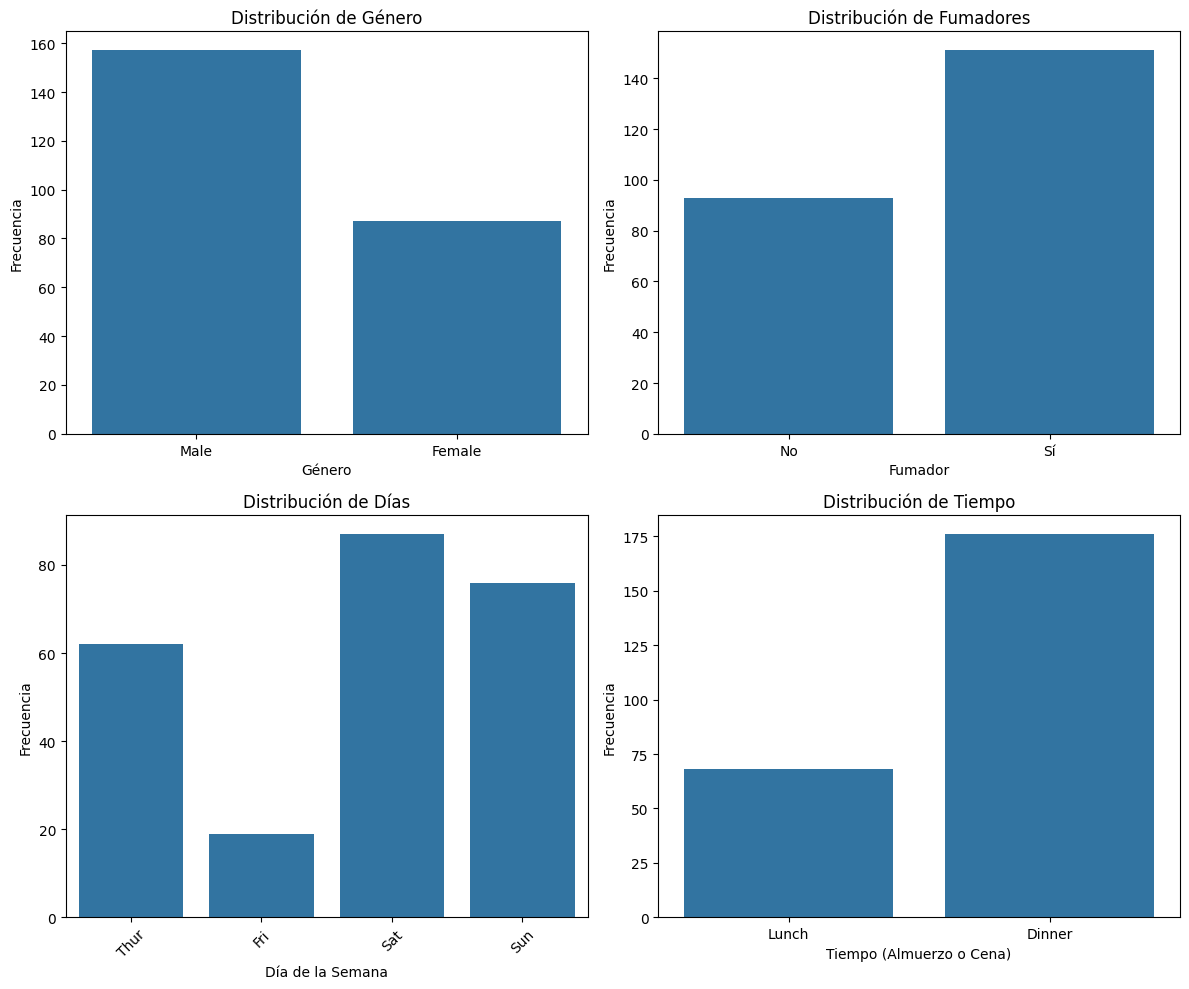

In [18]:
# Distribución por variable categórica 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

## sex
sns.countplot(data=df, x='sex', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Género')
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Frecuencia')

## smoker
sns.countplot(data=df, x='smoker', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Fumadores')
axes[0, 1].set_xlabel('Fumador')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_xticklabels(['No', 'Sí'])

## day
sns.countplot(data=df, x='day', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Días')
axes[1, 0].set_xlabel('Día de la Semana')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

## time
sns.countplot(data=df, x='time', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Tiempo')
axes[1, 1].set_xlabel('Tiempo (Almuerzo o Cena)')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

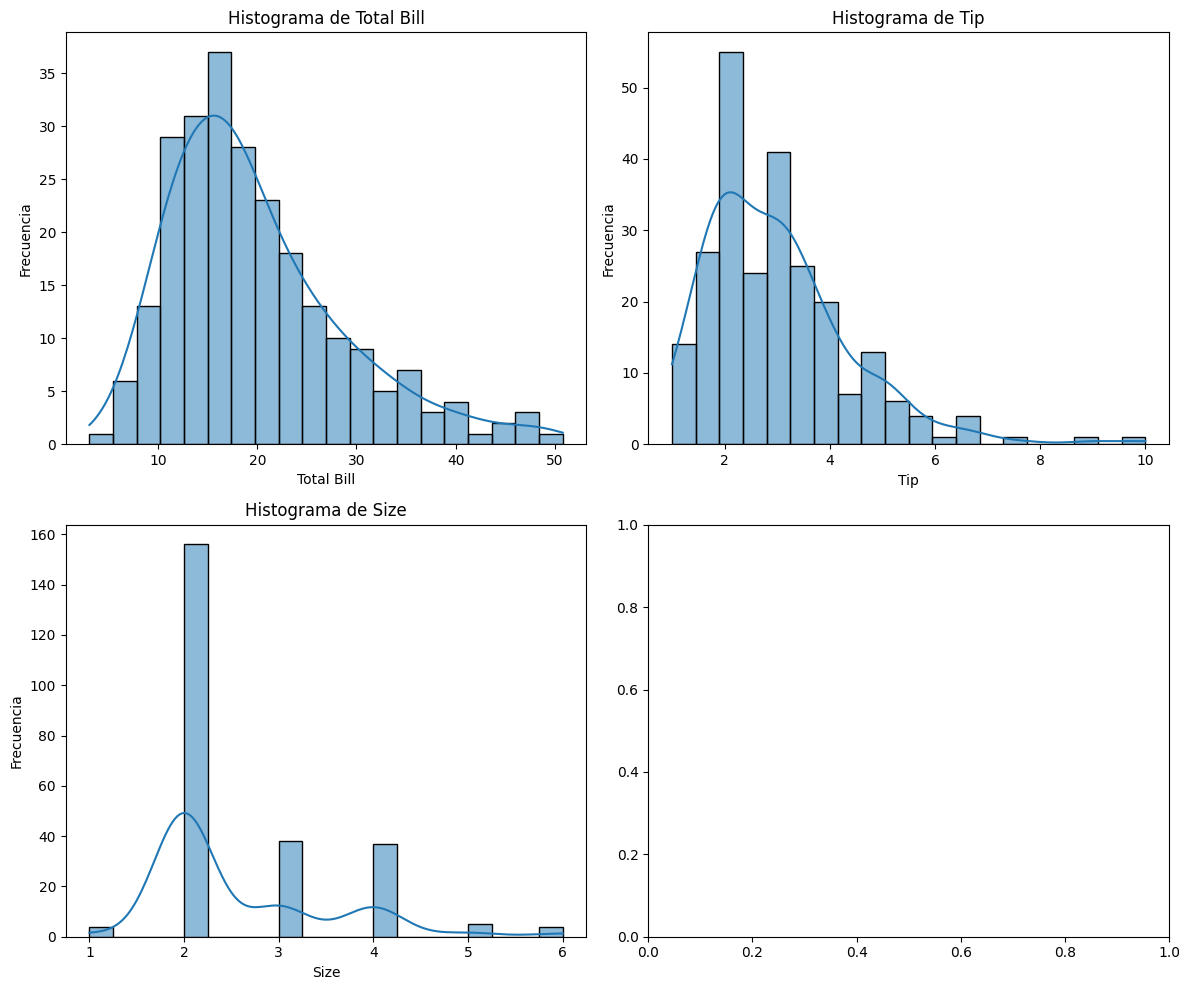

In [19]:
# Histogramas por variables numéricas 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

## total bill
sns.histplot(df['total_bill'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de Total Bill')
axes[0, 0].set_xlabel('Total Bill')
axes[0, 0].set_ylabel('Frecuencia')

## tip
sns.histplot(df['tip'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histograma de Tip')
axes[0, 1].set_xlabel('Tip')
axes[0, 1].set_ylabel('Frecuencia')

## size
sns.histplot(df['size'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histograma de Size')
axes[1, 0].set_xlabel('Size')
axes[1, 0].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

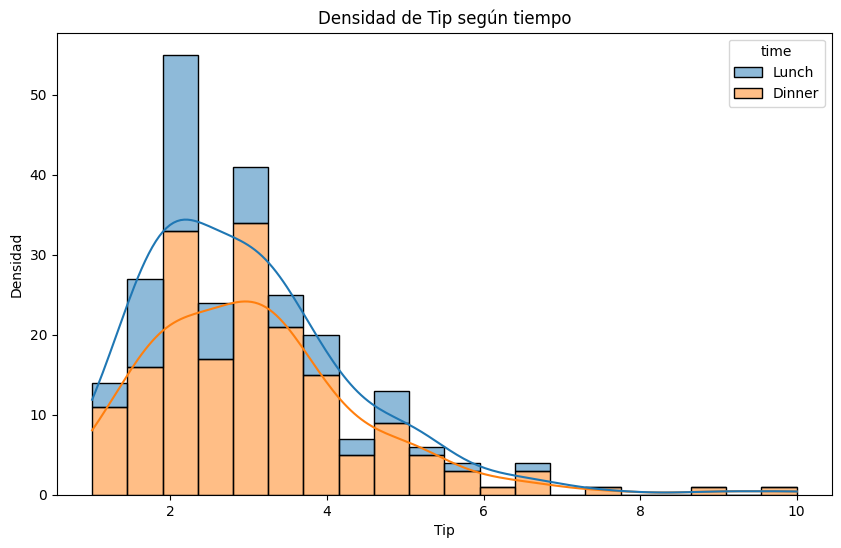

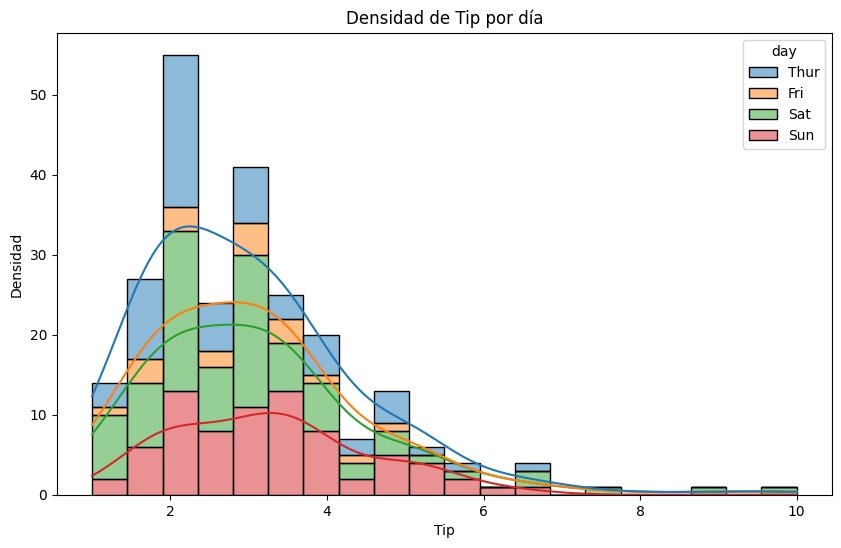

In [31]:
# Histogramas por categoría (análisis de tips)

plt.figure(figsize=(10, 6))
sns.histplot(df, x='tip', hue='time', bins=20, kde=True, multiple="stack")
plt.title('Densidad de Tip según tiempo')
plt.xlabel('Tip')
plt.ylabel('Densidad')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df, x='tip', hue='day', bins=20, kde=True, multiple="stack")
plt.title('Densidad de Tip por día')
plt.xlabel('Tip')
plt.ylabel('Densidad')
plt.show()

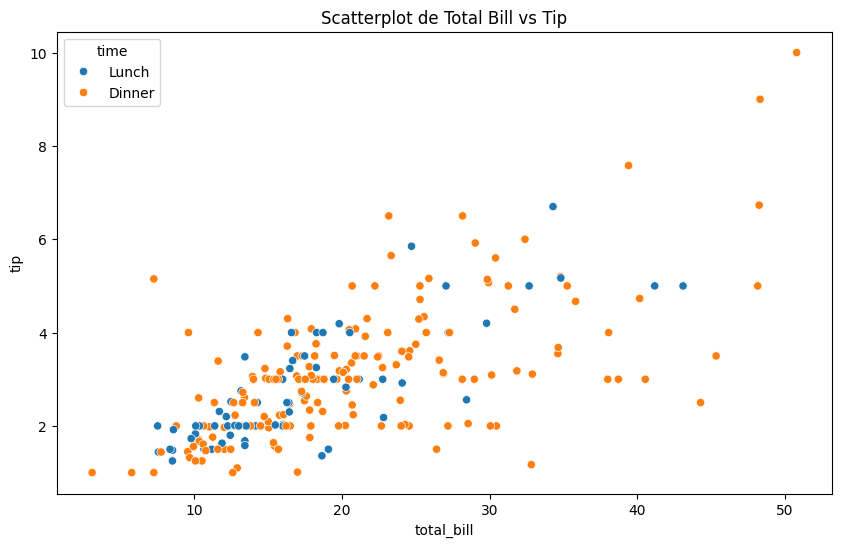

In [53]:
# Relaciones entre variables 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')
plt.title('Scatterplot de Total Bill vs Tip')
plt.show()

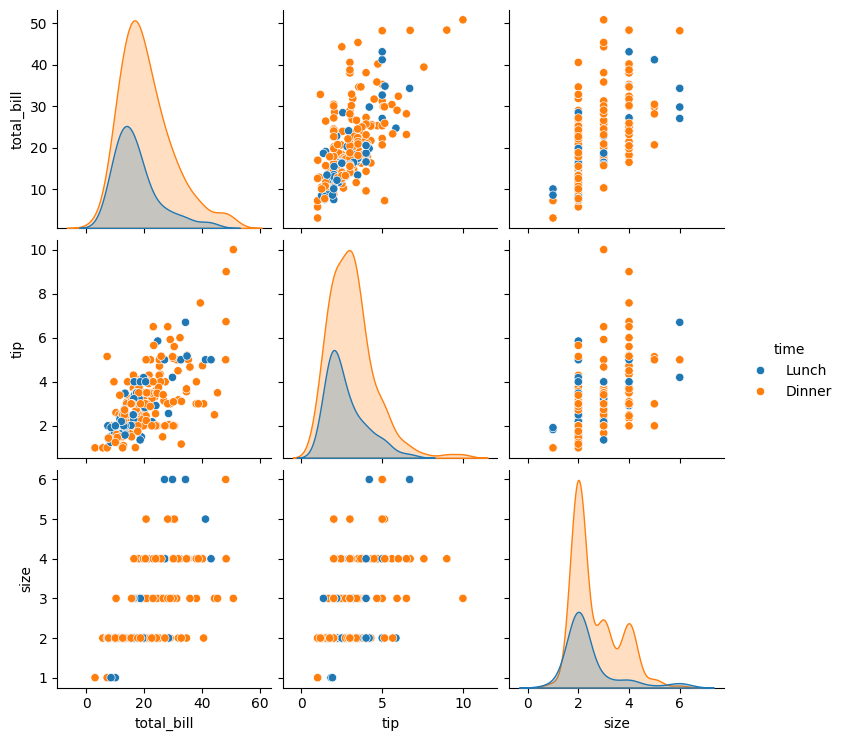

In [58]:

# Pairplot - time 
sns.pairplot(df, hue='time')
plt.show()

<Figure size 400x400 with 0 Axes>

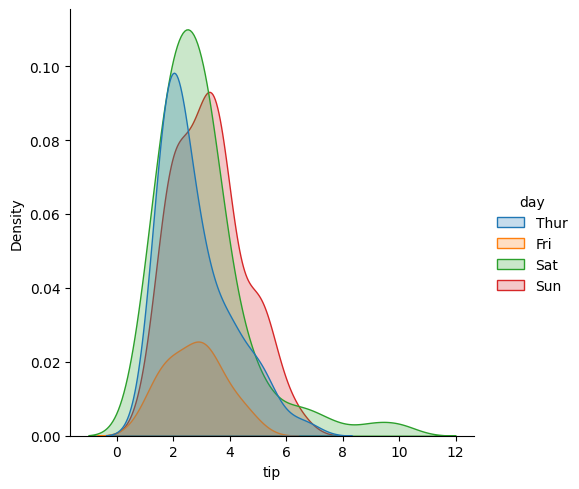

In [60]:
plt.figure(figsize=(4,4))
sns.displot(data=df, x='tip', kind='kde', fill=True, hue='day')
plt.show()

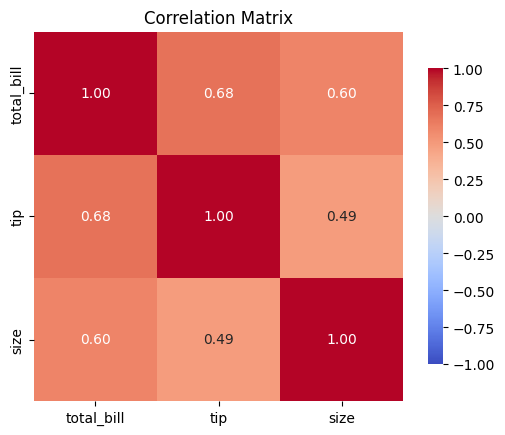

In [64]:
df_corr = df.drop(columns = ['sex', 'time', 'day', 'smoker'])

fig = plt.figure()
sns.heatmap(df_corr.corr(), 
           vmin=-1, vmax=1, 
           cmap='coolwarm',
           annot=True, 
           fmt=".2f", 
           square=True, 
           cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [77]:
# Estadística descriptiva 

tip = df.tip

promedio = tip.mean()
media = tip.median()

print(f'Promedio = {promedio:.2f} \nMedia = {media:.2f}')


Promedio = 3.00 
Media = 2.90


In [79]:
bill = df.total_bill

promedio = bill.mean()
media = bill.median()

print(f'Promedio = {promedio:.2f} \nMedia = {media:.2f}' )


Promedio = 19.79 
Media = 17.80


In [81]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [82]:
df_corr.min()

total_bill    3.07
tip           1.00
size          1.00
dtype: float64

In [83]:
df_corr.max()

total_bill    50.81
tip           10.00
size           6.00
dtype: float64

In [84]:
df_corr.std()

total_bill    8.902412
tip           1.383638
size          0.951100
dtype: float64

In [85]:
df_corr.var()

total_bill    79.252939
tip            1.914455
size           0.904591
dtype: float64